In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import random

In [4]:
alist=[]                          # 뽑은 a를 넣어 중복 방지해주는 리스트         
for i in range(100):
    a = random.randint(0,150)       
    while a in alist :        # a가 이미 뽑은 리스트에 있을 때까지 다시 뽑자
        a = random.randint(0,150)
    alist.append(a) # 새로운 a 값을 리스트에 추가

In [5]:
alist = np.array(alist, dtype = int)

In [6]:
alist.max()

150

In [7]:
alist *= 100

In [8]:
alist.max()

15000

In [9]:
alist.sort()

In [10]:
alist = alist.tolist()

In [11]:
anomaly_types = [
                {"length": 25, "channel": 0, "kinds": [{"kind": "amplitude", "amplitude_factor": 3.0}], 'exact-position':0},
                {"length": 25, "channel": 0, "kinds": [{"kind": "amplitude", "amplitude_factor": 0.5}], 'exact-position':0},
                {"length": 25, "channel": 0, "kinds": [{"kind": "frequency", "frequency_factor": 5.0}], 'exact-position':0},
]

In [12]:
anomaly_types[1]

{'length': 25,
 'channel': 0,
 'kinds': [{'kind': 'amplitude', 'amplitude_factor': 0.5}],
 'exact-position': 0}

In [13]:
anomalies = []

In [14]:
import copy

In [15]:
for i in alist:
    rand_idx = random.randint(0, 2)
    temp = copy.deepcopy(anomaly_types[rand_idx])
    temp['exact-position'] = i
    anomalies.append(temp)
    del temp

In [16]:
len(anomalies)

100

In [17]:
from gutenTAG import GutenTAG, TrainingType, LABEL_COLUMN_NAME


config = {
    "timeseries": [
        {
            "name": "test",
            "length": 16000,
            "base-oscillations": [
                {"kind": "sine",
                'frequency': 20,
#                'amplitude':2.5,
                'variance':0.2},
                
            ],
            "anomalies": anomalies
        }
    ]
}
gutentag = GutenTAG(seed=42)
gutentag.load_config_dict(config)

# call generate() to create the datasets (in-memory)
datasets = gutentag.generate(return_timeseries=True)

# we only defined a single test time series
assert len(datasets) == 1
d = datasets[0]
assert d.name == "test"
assert d.training_type == TrainingType.TEST

# the data points are stored at
train = d.timeseries
train.iloc[:, 1:-1]
# the labels are stored at
train[LABEL_COLUMN_NAME]

Initializing addons: 0it [00:00, ?it/s]
Generating datasets: 100%|██████████| 1/1 [00:00<00:00, 13.06it/s]
Finalizing addons: 0it [00:00, ?it/s]


timestamp
0        1
1        1
2        1
3        1
4        1
        ..
15995    0
15996    0
15997    0
15998    0
15999    0
Name: is_anomaly, Length: 16000, dtype: int8

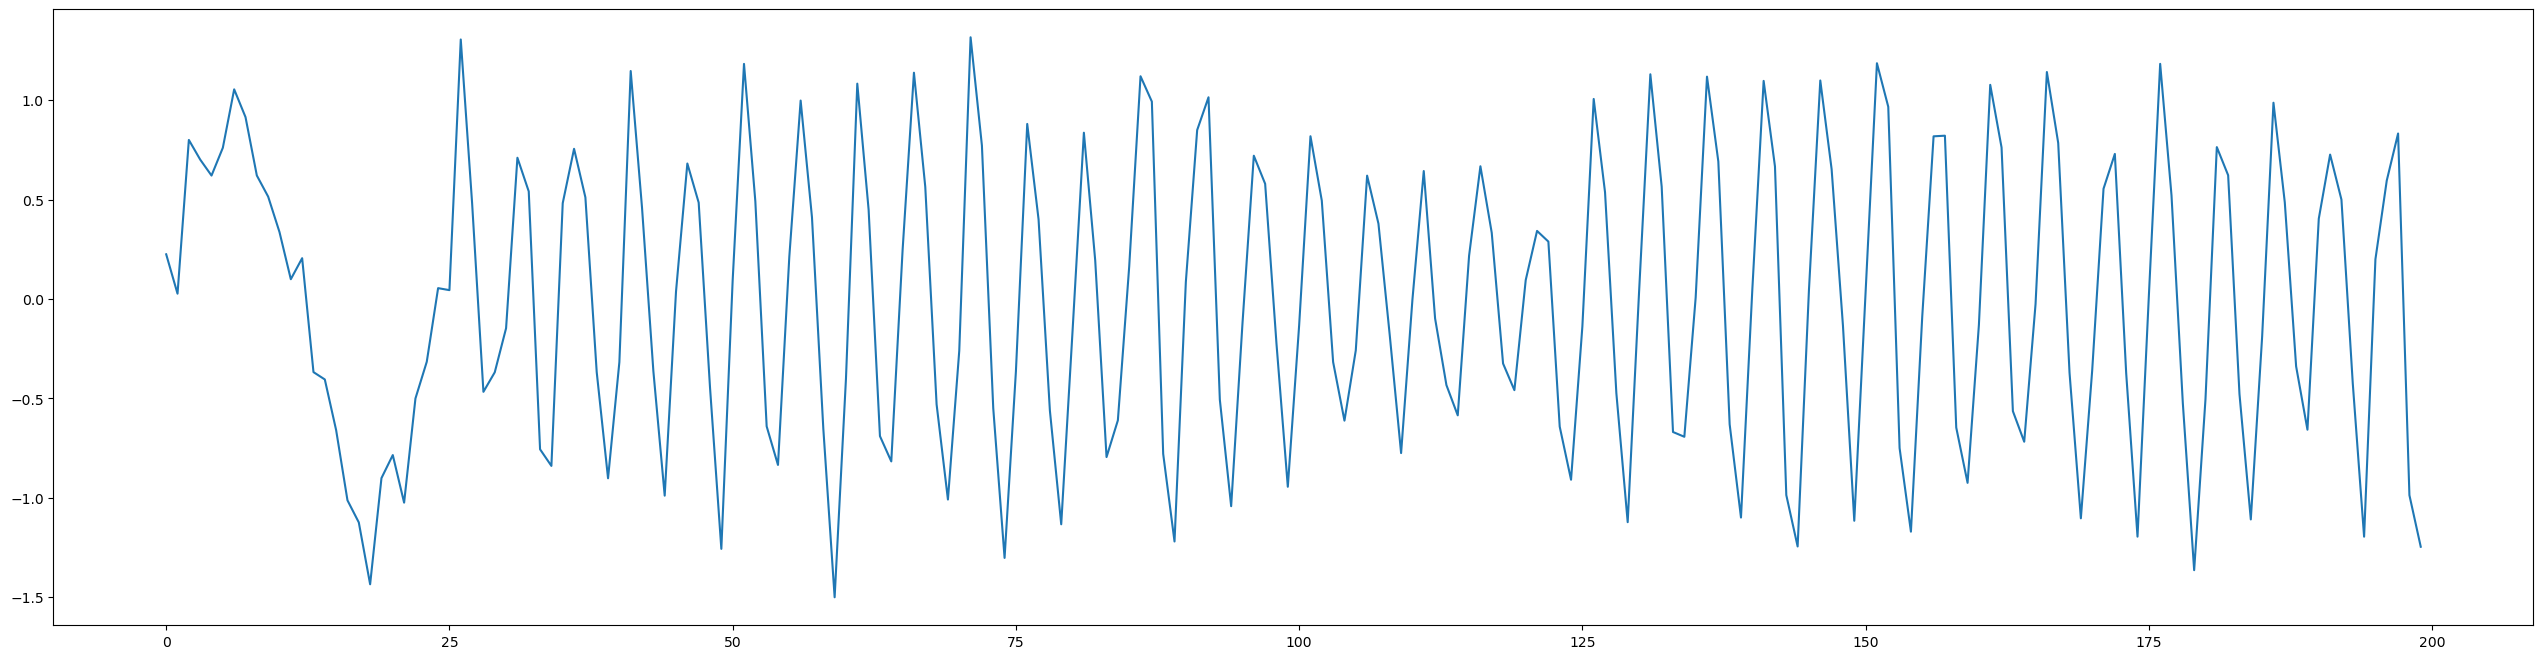

In [18]:
plt.figure(figsize=(32, 8))
plt.plot(train['value-0'][0:200])

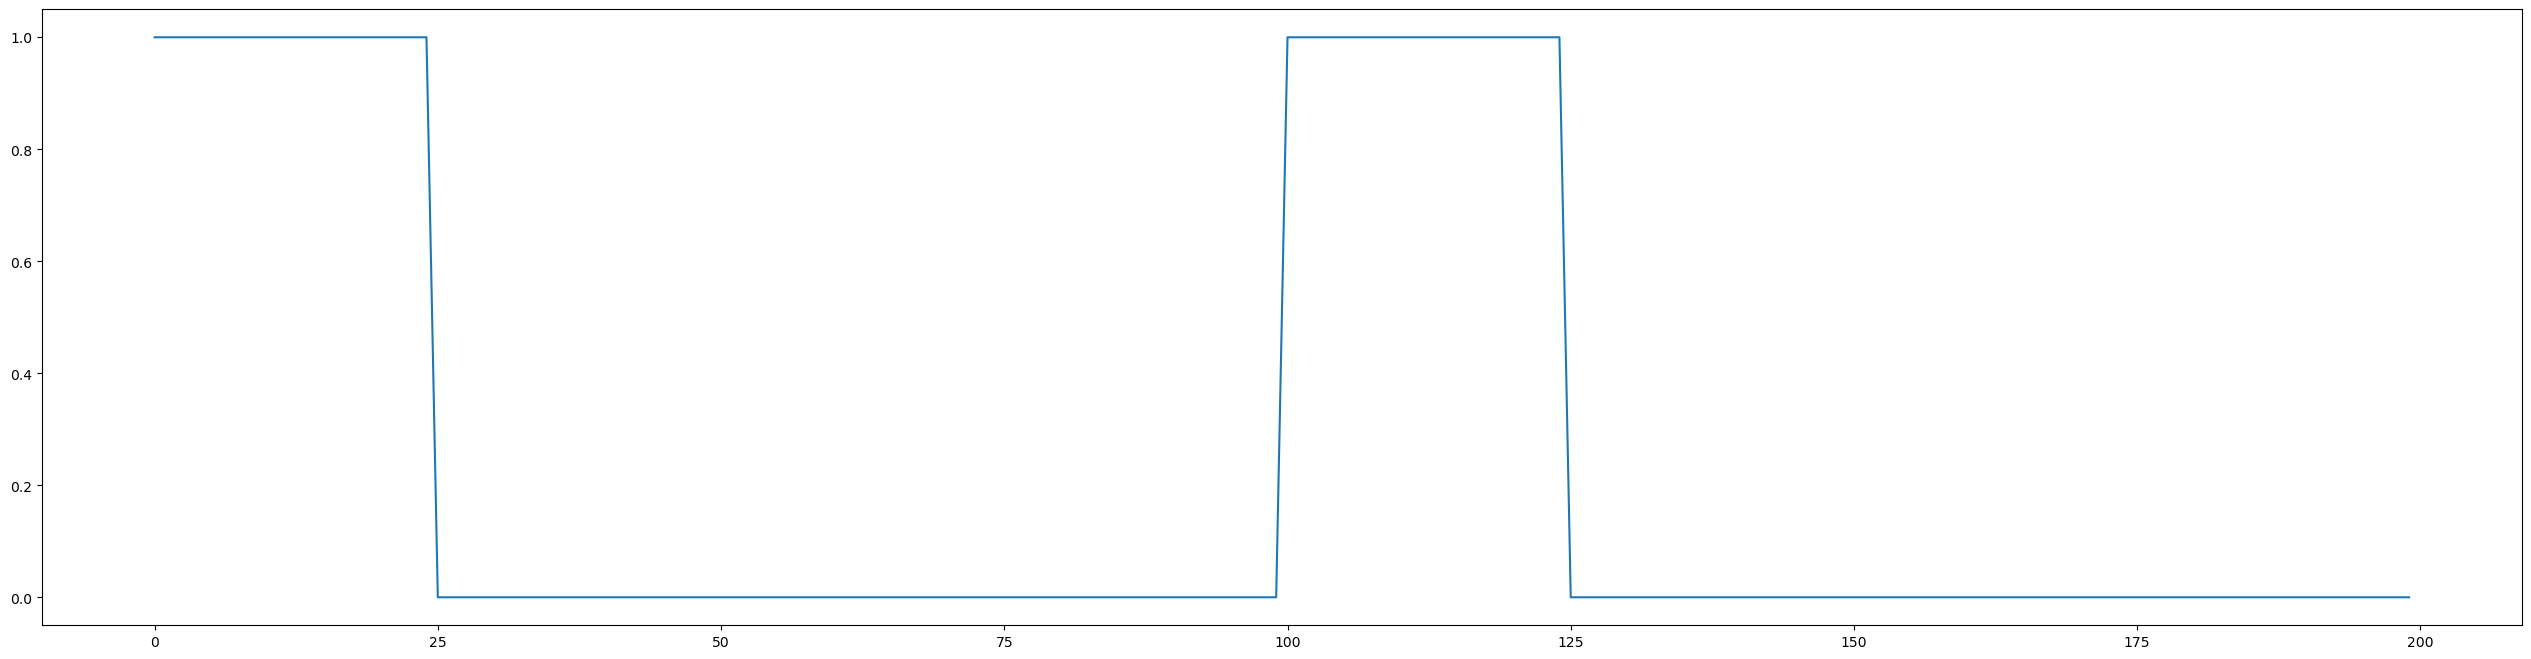

In [19]:
plt.figure(figsize=(32, 8))
plt.plot(train['is_anomaly'][0:200])

In [20]:
 
alist=[]                          # 뽑은 a를 넣어 중복 방지해주는 리스트         
for i in range(100):
    a = random.randint(0,150)       
    while a in alist :        # a가 이미 뽑은 리스트에 있을 때까지 다시 뽑자
        a = random.randint(0,150)
    alist.append(a) # 새로운 a 값을 리스트에 추가
alist = np.array(alist, dtype = int)
alist *= 100
alist.sort()
alist = alist.tolist()

anomalies = []

for i in alist:
    rand_idx = random.randint(0, 2)
    temp = copy.deepcopy(anomaly_types[rand_idx])
    temp['exact-position'] = i
    anomalies.append(temp)
    del temp

In [21]:
from gutenTAG import GutenTAG, TrainingType, LABEL_COLUMN_NAME


config = {
    "timeseries": [
        {
            "name": "test",
            "length": 16000,
            "base-oscillations": [
                {"kind": "sine",
                'frequency': 20,
#                'amplitude':2.5,
                'variance':0.2},
                
            ],
            "anomalies": anomalies
        }
    ]
}
gutentag = GutenTAG(seed=42)
gutentag.load_config_dict(config)

# call generate() to create the datasets (in-memory)
datasets = gutentag.generate(return_timeseries=True)

# we only defined a single test time series
assert len(datasets) == 1
d = datasets[0]
assert d.name == "test"
assert d.training_type == TrainingType.TEST

# the data points are stored at
test = d.timeseries
test.iloc[:, 1:-1]
# the labels are stored at
test[LABEL_COLUMN_NAME]

Initializing addons: 0it [00:00, ?it/s]
Generating datasets: 100%|██████████| 1/1 [00:00<00:00, 13.56it/s]
Finalizing addons: 0it [00:00, ?it/s]


timestamp
0        1
1        1
2        1
3        1
4        1
        ..
15995    0
15996    0
15997    0
15998    0
15999    0
Name: is_anomaly, Length: 16000, dtype: int8

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
import collections 
import time
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [23]:
n = 120
X_train_adl, X_train_fall, y_train_adl, y_train_fall = list(), list(), list(), list()

for i in tqdm(range(0, len(train)-n)):
    temp = list()
    
    temp.append(train['value-0'][i : i + n])
    
    cnt = collections.Counter(train['is_anomaly'][i: i + n])
    num_adl = cnt[0]
    num_fall = cnt[1]
    
    if num_fall == 25:
        y_train_fall.append(1)
        X_train_fall.append(temp)
                    
    elif num_fall == 0:
        y_train_adl.append(0)
        X_train_adl.append(temp)
    else:
        continue

100%|██████████| 15880/15880 [00:02<00:00, 5757.92it/s]


In [24]:
X_test_adl, X_test_fall, y_test_adl, y_test_fall, fall_range = list(), list(), list(), list(), list()
for i in tqdm(range(0, len(test) - n)):
    temp = list()
    
    temp.append(test['value-0'][i : i + n])
    
    cnt = collections.Counter(test['is_anomaly'][i : i + n])
    num_adl = cnt[0]
    num_fall = cnt[1]
    
    if num_fall == 25:
        y_test_fall.append(1)
        X_test_fall.append(temp)
                
        fall_range.append(test['is_anomaly'][i : i + n])
        
    elif num_fall == 0:
        y_test_adl.append(0)
        X_test_adl.append(temp)
    else:
        continue

100%|██████████| 15880/15880 [00:03<00:00, 5061.85it/s]


In [25]:
index = 450

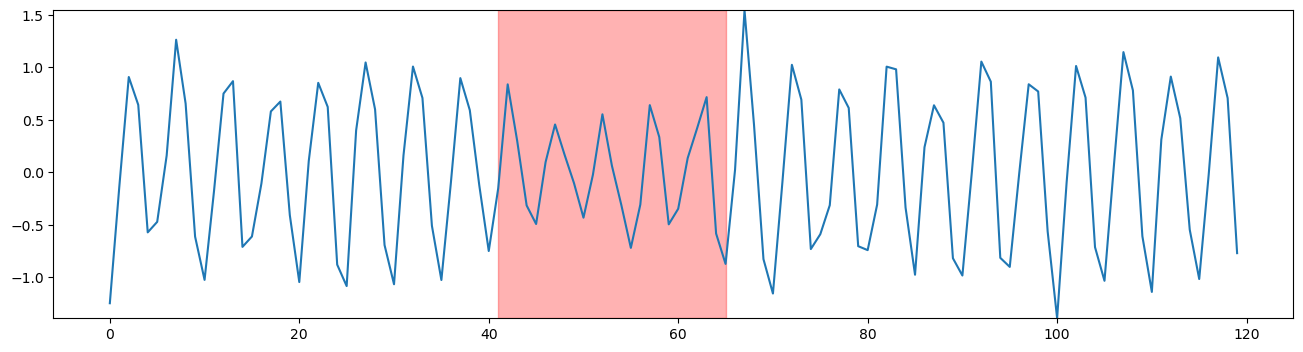

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# fall_range[index]에서 값이 1인 부분의 시작과 끝 인덱스 찾기
ones = np.where(fall_range[index] == 1)[0]
start_indices = np.where(np.diff(ones) != 1)[0] + 1
start_indices = np.insert(start_indices, 0, 0)
end_indices = np.where(np.diff(ones) != 1)[0]
end_indices = np.append(end_indices, len(ones) - 1)
plt.figure(figsize=(16, 4))
# Plot
x = np.array(X_test_fall[index]).transpose(1, 0)
plt.plot(x)

y1 = min(np.min(x), 0)
y2 = max(np.max(x), 1)

# 각 값이 1인 부분에 대해 빨간색 배경 추가
for start, end in zip(start_indices, end_indices):
    plt.fill_betweenx([y1, y2], ones[start], ones[end], color='red', alpha=0.3)

plt.ylim(y1, y2)
plt.show()


In [27]:
print(len(y_train_fall))
print(len(y_train_adl))

7004
4371


In [28]:
print(len(y_test_fall))
print(len(y_test_adl))

6684
4723


# 확인

In [29]:
a = min(len(y_train_fall), len(y_train_adl))
b = min(len(y_test_fall), len(y_test_adl))

In [30]:
X_train_adl = X_train_adl[:a]
y_train_adl = y_train_adl[:a]

y_train = y_train_adl + y_train_fall[:a]
X_train = X_train_adl + X_train_fall[:a]

In [31]:
X_test_adl = X_test_adl[:b]
y_test_adl = y_test_adl[:b]

y_test = y_test_adl + y_test_fall[:b]
X_test = X_test_adl + X_test_fall[:b]

In [32]:
fall_num = b

In [33]:
print(len(y_test_fall))
print(len(y_test_adl))

6684
4723


In [34]:
print('length of test data', len(X_test))

length of test data 9446


In [35]:
print('train data adl and fall ratio')
print('--------------------------------')
cnt_train = collections.Counter(y_train)
print('train data adl ratio: ', cnt_train[0])
print('train data fall ratio: ', cnt_train[1])
print('--------------------------------')

cnt_test = collections.Counter(y_test)
print('test data adl ratio: ', cnt_test[0])
print('test data fall ratio: ', cnt_test[1])

train data adl and fall ratio
--------------------------------
train data adl ratio:  4371
train data fall ratio:  4371
--------------------------------
test data adl ratio:  4723
test data fall ratio:  4723


In [36]:
np.asarray(X_train).transpose(0, 2, 1).shape

(8742, 120, 1)

In [37]:
X_train = np.asarray(X_train).transpose(0, 2, 1)
y_train = np.asarray(y_train).reshape(-1, )

X_test = np.asarray(X_test).transpose(0, 2, 1)
y_test = np.asarray(y_test).reshape(-1, )

In [38]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

y_train = enc.fit_transform(y_train)
y_test = enc.fit_transform(y_test)

In [39]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8742, 120, 1), (8742,), (9446, 120, 1), (9446,))

In [40]:
fall_segment = np.asarray(fall_range)[:fall_num]

In [41]:
fall_segment.shape

(4723, 120)

In [42]:
np.where(y_train == 1)

(array([4371, 4372, 4373, ..., 8739, 8740, 8741]),)

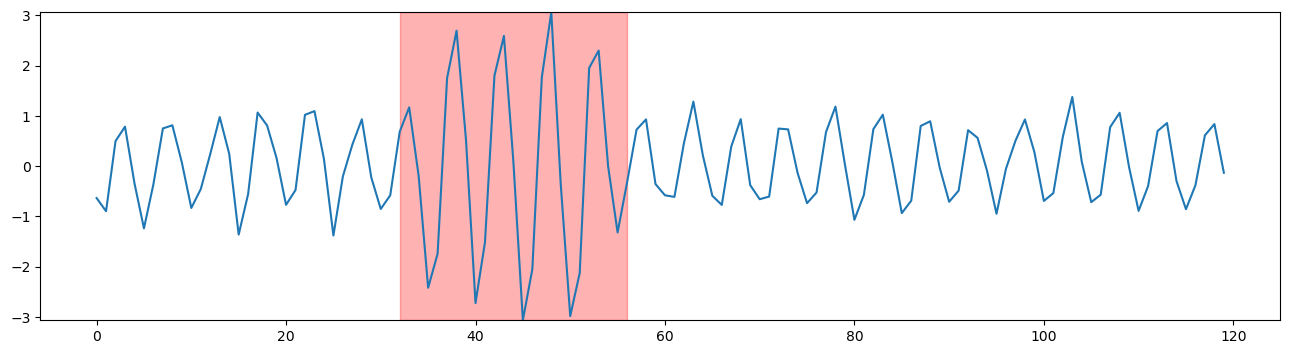

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# fall_range[index]에서 값이 1인 부분의 시작과 끝 인덱스 찾기
ones = np.where(fall_segment[-1000] == 1)[0]
start_indices = np.where(np.diff(ones) != 1)[0] + 1
start_indices = np.insert(start_indices, 0, 0)
end_indices = np.where(np.diff(ones) != 1)[0]
end_indices = np.append(end_indices, len(ones) - 1)
plt.figure(figsize=(16, 4))
# Plot
x = np.array(X_test[-1000])
plt.plot(x)

y1 = min(np.min(x), 0)
y2 = max(np.max(x), 1)

# 각 값이 1인 부분에 대해 빨간색 배경 추가
for start, end in zip(start_indices, end_indices):
    plt.fill_betweenx([y1, y2], ones[start], ones[end], color='red', alpha=0.3)

plt.ylim(y1, y2)
plt.show()


In [44]:
X_train.shape, y_train.shape

((8742, 120, 1), (8742,))

In [45]:
indices = np.random.permutation(X_train.shape[0])

X_train_shuffled = X_train[indices]
y_train_shuffled = y_train[indices]

In [46]:
np.save('../../uni_syn_train.npy', X_train_shuffled)
np.save('../../uni_syn_train_label.npy', y_train_shuffled)
np.save('../../uni_syn_test.npy', X_test)
np.save('../../uni_syn_test_label.npy', y_test)
np.save('../../uni_syn_range.npy', fall_segment)

In [47]:
y_train_shuffled[6]

0

# 데이터 시각화 샘플

In [4]:
import numpy as np

In [12]:
import matplotlib.pyplot as plt

In [13]:
test = np.load('../../uni_syn_test.npy')

In [14]:
fall = np.load('../../uni_syn_range.npy')

In [15]:
ones = np.where(fall[0] == 1)[0]

In [16]:
start_indices = np.where(np.diff(ones) != 1)[0] + 1
start_indices = np.insert(start_indices, 0, 0)
end_indices = np.where(np.diff(ones) != 1)[0]
end_indices = np.append(end_indices, len(ones) - 1)

In [17]:
fall_num = 4723

In [18]:
y1 = min(np.min(test[fall_num]), 0)
y2 = max(np.max(test[fall_num]), 1)

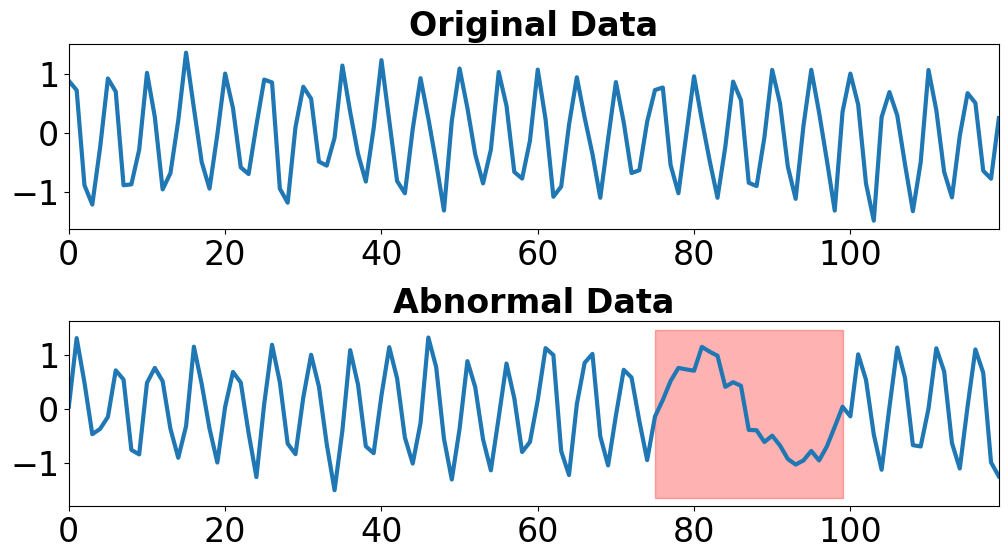

In [23]:
fig, axs = plt.subplots(2, 1, figsize=(12, 6))
plt.subplots_adjust(hspace=0.5)

axs[0].plot(test[6], linewidth=3)
axs[0].tick_params(axis='both', labelsize=24)
axs[0].set_title('Original Data', fontsize=24, fontweight="bold")


axs[1].plot(test[fall_num], linewidth=3)
axs[1].tick_params(axis='both', labelsize=24)
axs[1].set_title('Abnormal Data', fontsize=24, fontweight="bold")

axs[0].set_xlim(0, 119)
axs[1].set_xlim(0, 119)

y1, y2 = axs[1].get_ylim()
axs[1].fill_betweenx([y1, y2], ones[0], ones[-1], color='red', alpha=0.3)
# fig.text(0.5, -0.01, 'Time', ha='center', fontsize=24)
# fig.text(0.05, 0.5, 'Value', va='center', rotation='vertical', fontsize=24)

plt.show()

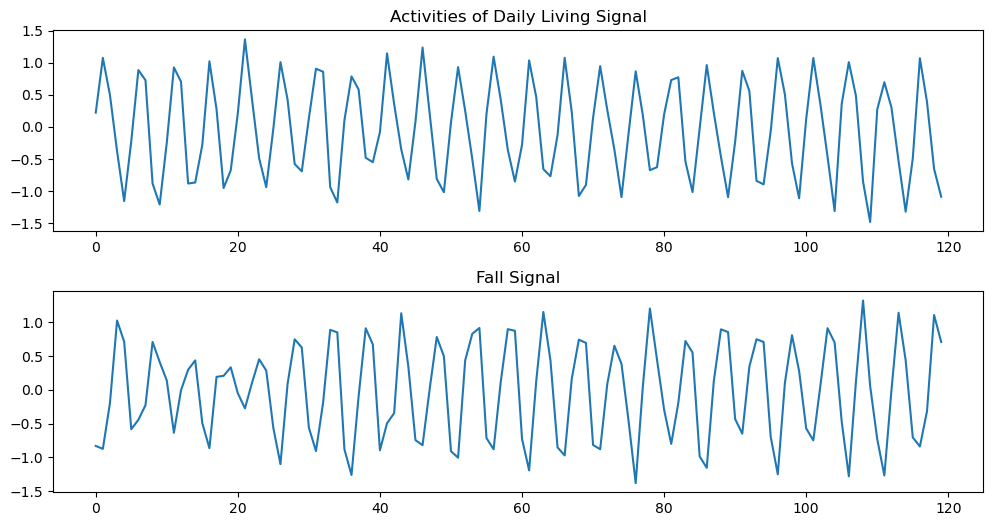

In [20]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(test[0])
plt.title('Activities of Daily Living Signal')
plt.subplot(2, 1, 2)
plt.plot(test[5004])

plt.subplots_adjust(hspace=0.3)  # hspace 값을 조절하여 상하 간격을 변경하세요.
plt.title('Fall Signal')
plt.show()